In [1]:
import requests
import re
import urllib.parse as urlparse
import time
import random
import numpy as np
from lxml import html
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('LC_R_1.csv',delimiter=',')

In [4]:
df.head()

,Rank,Title,Recruitment,Study Results,Conditions,Interventions,URL
0,1,Pemetrexed Plus Cetuximab in Patients With Rec...,Completed,Has Results,Non-Small Cell Lung Cancer,Drug: Pemetrexed|Drug: Cetuximab,https://ClinicalTrials.gov/show/NCT00216203
1,2,Trial Comparing Cetuximab With Pemetrexed/Cetu...,Terminated,Has Results,Non-small Cell Lung Cancer,Drug: Cetuximab|Drug: Pemetrexed,https://ClinicalTrials.gov/show/NCT00203931
2,3,Cisplatin/Etoposide/Radiotherapy +/- Consolida...,Completed,Has Results,Non-Small Cell Lung Cancer,Drug: Cisplatin|Drug: Etoposide|Radiation: Rad...,https://ClinicalTrials.gov/show/NCT00216125
3,4,Ridaforolimus With Cetuximab for Patients With...,Terminated,Has Results,Non-Small Cell Lung Cancer,Drug: Ridaforolimus|Drug: Ridaforolimus,https://ClinicalTrials.gov/show/NCT01212627
4,5,GW786034 in Patients With Non Small Cell Lung ...,Terminated,Has Results,Non Small Cell Lung Cancer,Drug: Pazopanib (GW786034),https://ClinicalTrials.gov/show/NCT01049776


In [5]:
df.shape

(563, 7)

In [6]:
def mapping(string):
    return str(string).split('|')

In [7]:
drug_split = df.Interventions.map(mapping)

In [8]:
len_drug_split = np.zeros((len(drug_split)))
for i in range(len(drug_split)):
    len_drug_split[i] = len(drug_split[i])
    if len_drug_split[i]<5:
        print(drug_split[i])

['Drug: Pemetrexed', 'Drug: Cetuximab']
['Drug: Cetuximab', 'Drug: Pemetrexed']
['Drug: Cisplatin', 'Drug: Etoposide', 'Radiation: Radiation', 'Drug: Docetaxel']
['Drug: Ridaforolimus', 'Drug: Ridaforolimus']
['Drug: Pazopanib (GW786034)']
['Drug: Paclitaxel', 'Drug: Gemcitabine', 'Biological: Avastin']
['Radiation: PET positive nodal disease measuring 15 mm or greater', 'Radiation: PET positive nodal disease measuring less than 15 mm', 'Radiation: Patients considered resectable']
['Biological: Ramucirumab', 'Drug: Paclitaxel', 'Drug: Carboplatin']
['Drug: Endostatin']
['Drug: AUY922']
['Drug: Pioglitazone']
['Drug: Docetaxel and cisplatin', 'Radiation: Docetaxel and cisplatin Plus Hypofractionated Radiotherapy']
['Drug: Docetaxel and Cisplatin']
['Drug: Pazopanib', 'Drug: Erlotinib']
['Drug: custirsen sodium']
['Drug: Gefitinib', 'Drug: Placebo']
['Drug: Sorafenib', 'Drug: Erlotinib']
['Drug: Ixabepilone', 'Drug: Carboplatin', 'Drug: Bevacizumab']
['Drug: Imatinib mesylate', 'Drug: Pa

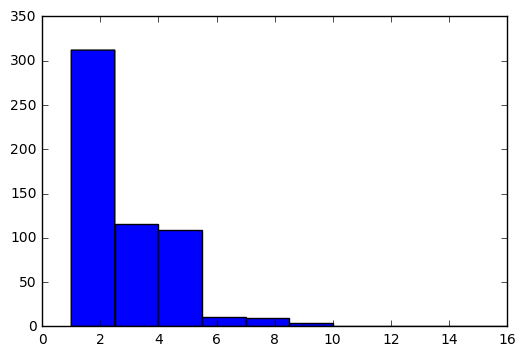

In [9]:
plt.hist(len_drug_split)
plt.show()

In [10]:
str(drug_split[0][1]).split(':')[0]==('Drug'or'drug')

True

In [11]:
Drug = np.zeros((563,2))
for i in drug_split[0]:
    print(i)

Drug: Pemetrexed
Drug: Cetuximab


In [12]:
#用于标记，治疗方案中药的个数
count_drug = np.zeros((len(drug_split),))
for i in range(len(drug_split)):
    if len_drug_split[i]>=2:
        for j in range(int(len_drug_split[i])):
            if drug_split[i][j][:4] == ('Drug' or 'drug'):
                count_drug[i]+=1


In [13]:
count_drug[count_drug==2].shape#用了两种药物，且只用药物的治疗方案个数

(181,)

In [14]:
#将使用了两种药物治疗的方案分别储存在Drug_1,2中
Drug_1 = []
Drug_2 = []
for i in range(len(drug_split)):
    if count_drug[i]==2:
        count = 0
        for j in range(int(len_drug_split[i])):
            if drug_split[i][j][:4] == ('Drug' or 'drug'):
                if count == 0:
                    Drug_1.append(drug_split[i][j])
                    count = 1
                else:
                    Drug_2.append(drug_split[i][j])
    #else:
        #Drug_1.append('')
        #Drug_2.append('')

In [15]:
#将仍然含有多种药的实验去掉
for i in range(len(Drug_1)):
    if (' plus ' in Drug_1[i]) or (' and ' in Drug_1[i]) or ('+' in Drug_1[i]) or (',' in Drug_1[i])or ('/' in Drug_1[i]):
        print(Drug_1[i],i)
        Drug_1[i]=' '
        Drug_2[i]=' '
    else:
        if (' plus ' in Drug_2[i]) or (' and ' in Drug_2[i]) or ('+' in Drug_2[i]) or (',' in Drug_2[i])or ('/' in Drug_2[i]):
            print(Drug_2[i],i)
            Drug_1[i]=' '
            Drug_2[i]=' '
    if 'Drug' in Drug_1[i][5:]:
        print(Drug_1[i],i)
        Drug_1[i]=' '
        Drug_2[i]=' '  
    else:
        if 'Drug' in Drug_2[i][5:]:
            print(Drug_2[i],i)
            Drug_1[i]=' '
            Drug_2[i]=' '
    if (Drug_1[i] == Drug_2[i])and(Drug_1[i]!=' '):
        print(Drug_2[i],i)
        Drug_1[i]=' '
        Drug_2[i]=' '
        #将重复的部分去掉：


Drug: Ridaforolimus 2
Drug: Erlotinib + Sorafenib 10
Drug: Suramin Drug:Docetaxel Drug: Carboplatin 17
Drug: RO5424802 25
Drug: Pemetrexed 500 mg/m2 33
Drug: bexarotene with carboplatin and paclitaxel 34
Drug: eribulin mesylate + erlotinib 36
Drug: Bevacizumab + Pemetrexed 45
Drug: apricoxib/erlotinib 48
Drug: CBP501 + Cisplatin + Pemetrexed 49
Drug: Ixabepilone, 32 mg/m^2 + Carboplatin, 5 mg/min/mL 50
Drug: cisplatin, dexamethasone,vitamin B12, folic acid 57
Drug: Calcitriol 67
Drug: Tarceva (Trademark) (erlotinib HCl, OSI-774) 69
Drug: Group 1: Radiation, Paclitaxel,Carbo, Dasatinib days 1-47 76
Drug: Docetaxel/Carboplatin/Bevacizumab/Erlotinib 77
Drug: Gemcitabine +Carboplatin 79
Drug: cetuximab + cisplatin + vinorelbine 81
Drug: TPC -Vinorelbine,Gemcitabine,Docetaxel, and Pemetrexed 87
Drug: Cisplatin + Gemcitabine with SUBATM-itraconazole 89
Drug: Nexavar (Sorafenib, BAY43-9006) + carboplatin + paclitaxel 96
Drug: Sorafenib (Nexavar, BAY43-9006) 103
Drug: pazopanib and pemetrexed 

In [16]:
Drug = np.vstack([Drug_1,Drug_2])

In [17]:
np.shape(Drug)

(2, 181)

In [18]:
Drug[:,:].T

array([['Drug: Pemetrexed', 'Drug: Cetuximab'],
       ['Drug: Cetuximab', 'Drug: Pemetrexed'],
       [' ', ' '],
       ['Drug: Paclitaxel', 'Drug: Gemcitabine'],
       ['Drug: Paclitaxel', 'Drug: Carboplatin'],
       ['Drug: Pazopanib', 'Drug: Erlotinib'],
       ['Drug: Gefitinib', 'Drug: Placebo'],
       ['Drug: Sorafenib', 'Drug: Erlotinib'],
       ['Drug: Imatinib mesylate', 'Drug: Paclitaxel'],
       ['Drug: Pralatrexate', 'Drug: Erlotinib'],
       [' ', ' '],
       ['Drug: Single low dose cyclophosphamide', 'Drug: Placebo'],
       ['Drug: Gemcitabine', 'Drug: Cisplatin'],
       ['Drug: Pemetrexed', 'Drug: Cisplatin'],
       ['Drug: Pemetrexed', 'Drug: Docetaxel'],
       ['Drug: Single low dose cyclophosphamide', 'Drug: Placebo'],
       ['Drug: Placebo (for Ramucirumab)', 'Drug: Docetaxel'],
       [' ', ' '],
       ['Drug: pemetrexed', 'Drug: carboplatin'],
       ['Drug: pemetrexed', 'Drug: cisplatin'],
       ['Drug: pemetrexed', 'Drug: docetaxel'],
       ['Dru

In [19]:
np.savetxt('two_drugs.csv',Drug.T,fmt="%s",delimiter=',')

In [20]:
count = 0
for i in range(len( Drug_1)):
    if Drug_1[i]!=' ':
        count +=1
print(count)
#有效的组合个数

149


In [21]:
np.shape(Drug)

(2, 181)

In [22]:
df2 = pd.read_csv('LC_C_NR.csv',delimiter=',')

In [23]:
df2.head()

,Rank,Title,Recruitment,Study Results,Conditions,Interventions,URL
0,1,Retrospective Study Evaluating IGF1R And p95HE...,Completed,No Results Available,Non Small Cell Lung Cancer,Genetic: Protein expression by immunohistochem...,https://ClinicalTrials.gov/show/NCT00763607
1,2,Iressa as a First-Line Treatment in Chemonaive...,Completed,No Results Available,Non-Small Cell Lung Cancer,Drug: Iressa,https://ClinicalTrials.gov/show/NCT00173875
2,3,Satraplatin and Paclitaxel in Patients With Ad...,Completed,No Results Available,Non-small Cell Lung Cancer,Drug: Satraplatin in combination with Paclitaxel,https://ClinicalTrials.gov/show/NCT00268970
3,4,Gemcitabine/Cisplatin Versus Gemcitabine/Epiru...,Completed,No Results Available,Non-Small Cell Lung Cancer,Drug: Gemcitabine|Drug: Cisplatin|Drug: Epirub...,https://ClinicalTrials.gov/show/NCT00154739
4,5,Docetaxel Plus Cisplatin Followed by Gemcitabi...,Completed,No Results Available,Non-small Cell Lung Cancer,"Drug: Docetaxel, Cisplatin|Drug: Gemcitabine, ...",https://ClinicalTrials.gov/show/NCT00173888


In [24]:
drug_split2 = df2.Interventions.map(mapping)

In [25]:
len_drug_split2 = np.zeros((len(drug_split2)))
for i in range(len(drug_split2)):
    len_drug_split2[i] = len(drug_split2[i])
    if len_drug_split2[i]<5:
        print(drug_split2[i])

['Genetic: Protein expression by immunohistochemistry and immunofluorescence']
['Drug: Iressa']
['Drug: Satraplatin in combination with Paclitaxel']
['Drug: Gemcitabine', 'Drug: Cisplatin', 'Drug: Epirubicin']
['Drug: Docetaxel, Cisplatin', 'Drug: Gemcitabine, Cisplatin']
['Drug: KOS-1584']
['Drug: sildenafil', 'Drug: placebo', 'Drug: paclitaxel (taxol)', 'Drug: carboplatin (palaplatin)']
['Drug: Carboplatin/Paclitaxel/MEDI-575', 'Drug: Carboplatin/Paclitaxel', 'Drug: Carboplatin/Paclitaxel/MEDI-575']
['Drug: ABI-007']
['nan']
['Drug: decitabine in combination with genistein']
['Drug: AZD6244', 'Drug: docetaxel', 'Drug: Placebo']
['Drug: Ispinesib']
['Radiation: Radiolabeled (99Tc) EC-DG (ethylenedicysteine-deoxyglucose)', 'Radiation: 18 F fluorodeoxyglucose']
['Drug: sorafenib (Nexavar)']
['Drug: cisplatin/docetaxel', 'Drug: cisplatin/vinorelbine']
['Drug: Exisulind']
['nan']
['Drug: docetaxel and cisplatin']
['Drug: AZD6244', 'Drug: Pemetrexed']
['Drug: UFUR and Iressa']
['Drug: cisp

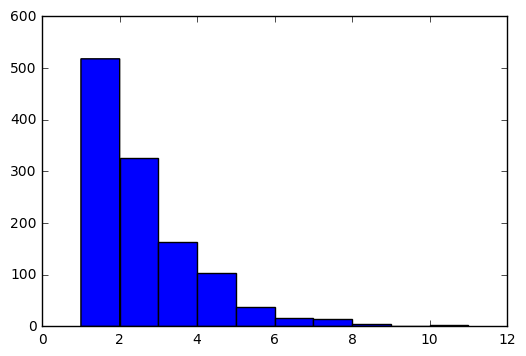

In [26]:
plt.hist(len_drug_split2)
plt.show()

In [27]:
#用于标记，治疗方案中药的个数
count_drug2 = np.zeros((len(drug_split2),))
for i in range(len(drug_split2)):
    if len_drug_split2[i]>=2:
        for j in range(int(len_drug_split2[i])):
            if drug_split2[i][j][:4] == ('Drug' or 'drug'):
                count_drug2[i]+=1


In [191]:
count_drug2[count_drug2==2].shape#用了两种药物，且只用药物的治疗方案个数

(297,)

In [239]:
#将使用了两种药物治疗的方案分别储存在Drug_1,2中
Drug2_1 = []
Drug2_2 = []
for i in range(len(drug_split2)):
    if count_drug2[i]==2:
        count2 = 0
        for j in range(int(len_drug_split2[i])):
            if drug_split2[i][j][:4] == ('Drug' or 'drug'):
                if count2 == 0:
                    Drug2_1.append(drug_split2[i][j])
                    count2 = 1
                else:
                    Drug2_2.append(drug_split2[i][j])
    #else:
        #Drug2_1.append('')
        #Drug2_2.append('')

In [240]:
#将仍然含有多种药的实验去掉
for i in range(len(Drug2_1)):
    if (' plus ' in Drug2_1[i]) or (' and ' in Drug2_1[i]) or ('+' in Drug2_1[i]) or (',' in Drug2_1[i])or ('/' in Drug2_1[i]):
        print(Drug2_1[i],i)
        Drug2_1[i]=' '
        Drug2_2[i]=' '
    
    if (' plus ' in Drug2_2[i]) or (' and ' in Drug2_2[i]) or ('+' in Drug2_2[i]) or (',' in Drug2_2[i])or ('/' in Drug2_2[i]):
        print(Drug2_2[i],i)
        Drug2_1[i]=' '
        Drug2_2[i]=' '
    if 'Drug' in Drug2_1[i][5:]:
        print(Drug2_1[i],i)
        Drug2_1[i]=' '
        Drug2_2[i]=' '  
    if 'Drug' in Drug2_2[i][5:]:
        print(Drug2_2[i],i)
        Drug2_1[i]=' '
        Drug2_2[i]=' '
    if (Drug2_1[i] == Drug2_2[i])and(Drug2_1[i]!=' '):
        print(Drug2_2[i],i)
        Drug2_1[i]=' '
        Drug2_2[i]=' '
        #将重复的部分去掉：


Drug: Docetaxel, Cisplatin 0
Drug: cisplatin/docetaxel 1
Drug: cisplatin + docetaxel 3
Drug: IPI 504 plus Docetaxel 16
Drug: AT-101 and docetaxel 21
Drug: Neoadjuvant chemotherapy (taxol and carboplatin) 24
Drug: Paclitaxel/Carboplatin/Gefitinib 26
Drug: Docetaxel 20mg/m2/week + carboplatin AUC 2/weekly - concomitant chemoradiation 2Gy/day 27
Drug: Paclitaxel / Carboplatin 29
Drug: PTK787/ ZK 222584 30
Drug: Erlotinib + docetaxel 31
Drug: gemcitabine/carboplatin 36
Drug: ARQ 197 plus erlotinib 47
Drug: ABT-869 .25 mg/kg 48
Drug: Gefitinib and Nimotuzumab 51
Drug: RO4929097 55
Drug: Docetaxel/cisplatin 57
Drug: Topotecan/Docetaxel combination 58
Drug: Dacomitinib 59
Drug: gemcitabine and carboplatin 64
Drug: Cetuximab + platinum + gemcitabine 70
Drug: Paclitaxel and Carboplatin 73
Drug: Gefitinib plus olaparib 75
Drug: Carboplatin // Gemcitabine // Docetaxel //Cisplatin 83
Drug: Carboplatin and Pemetrexed with Bevacizumab 7.5 mg/kg 85
Drug: Docetaxel 88
Drug: Erlotinib 107
Drug: MET/VEG

In [241]:
i

296

In [242]:
np.shape(Drug2_1)

(297,)

In [243]:
np.shape(Drug2_2)

(297,)

In [244]:
Drug2 = np.vstack([Drug2_1,Drug2_2])

In [245]:
np.savetxt('two_drugs2.csv',Drug2.T,fmt="%s",delimiter=',')

In [246]:
count2 = 0
for i in range(len( Drug2_1)):
    if Drug2_1[i]!=' ':
        count2 +=1
print(count2)
#无效的组合个数

243


In [247]:
np.shape(Drug)

(2, 181)

In [248]:
np.shape(Drug2)

(2, 297)

In [249]:
Drug2.T

array([[' ', ' '],
       [' ', ' '],
       ['Drug: AZD6244', 'Drug: Pemetrexed'],
       [' ', ' '],
       ['Drug: Anlotinib', 'Drug: Placebo'],
       ['Drug: Erlotinib (Tarceva)', 'Drug: Pemetrexed (Alimta)'],
       ['Drug: Talactoferrin', 'Drug: Placebo'],
       ['Drug: imetelstat', 'Drug: Bevacizumab'],
       ['Drug: Carboplatin', 'Drug: Paclitaxel'],
       ['Drug: Endostar(Recombinant Human Endostatin Injection)',
        'Drug: paclitaxel-carboplatin'],
       ['Drug: Docetaxel', 'Drug: Jin Fu Kang'],
       ['Drug: Iscar Quercus', 'Drug: Gemcitabine'],
       ['Drug: VELCADE', 'Drug: Alimta'],
       ['Drug: Pemetrexed', 'Drug: Bevacizumab'],
       ['Drug: Paclitaxel', 'Drug: Carboplatin'],
       ['Drug: Docetaxel', 'Drug: Bevacizumab'],
       [' ', ' '],
       ['Drug: Placebos', 'Drug: Sulijia'],
       ['Drug: LY2603618', 'Drug: Pemetrexed'],
       ['Drug: apatinib', 'Drug: placebo'],
       ['Drug: Anlotinib', 'Drug: Placebo capsule'],
       [' ', ' '],
       ['

In [250]:
Drug_non_empty_1 = []
for i in range(len(Drug.T)):
    if Drug.T[i][0]!=' ':
        Drug_non_empty_1.append(Drug.T[i])
        
Drug_non_empty_2 = []
for i in range(len(Drug2.T)):
    if Drug2.T[i][0]!=' ':
        Drug_non_empty_2.append(Drug2.T[i])

In [251]:
np.shape(Drug_non_empty_1)

(149, 2)

In [252]:
np.shape(Drug_non_empty_2)

(243, 2)

In [253]:
Drug_non_empty_1

[array(['Drug: Pemetrexed', 'Drug: Cetuximab'], 
       dtype='<U60'), array(['Drug: Cetuximab', 'Drug: Pemetrexed'], 
       dtype='<U60'), array(['Drug: Paclitaxel', 'Drug: Gemcitabine'], 
       dtype='<U60'), array(['Drug: Paclitaxel', 'Drug: Carboplatin'], 
       dtype='<U60'), array(['Drug: Pazopanib', 'Drug: Erlotinib'], 
       dtype='<U60'), array(['Drug: Gefitinib', 'Drug: Placebo'], 
       dtype='<U60'), array(['Drug: Sorafenib', 'Drug: Erlotinib'], 
       dtype='<U60'), array(['Drug: Imatinib mesylate', 'Drug: Paclitaxel'], 
       dtype='<U60'), array(['Drug: Pralatrexate', 'Drug: Erlotinib'], 
       dtype='<U60'), array(['Drug: Single low dose cyclophosphamide', 'Drug: Placebo'], 
       dtype='<U60'), array(['Drug: Gemcitabine', 'Drug: Cisplatin'], 
       dtype='<U60'), array(['Drug: Pemetrexed', 'Drug: Cisplatin'], 
       dtype='<U60'), array(['Drug: Pemetrexed', 'Drug: Docetaxel'], 
       dtype='<U60'), array(['Drug: Single low dose cyclophosphamide', 'Drug: Pla

In [254]:
Drug_non_empty_1 = np.asarray(Drug_non_empty_1)
Drug_non_empty_2 = np.asarray(Drug_non_empty_2)

In [255]:
D1 = Drug_non_empty_1 
D2 = Drug_non_empty_2

In [256]:
D1.astype('str')

array([['Drug: Pemetrexed', 'Drug: Cetuximab'],
       ['Drug: Cetuximab', 'Drug: Pemetrexed'],
       ['Drug: Paclitaxel', 'Drug: Gemcitabine'],
       ['Drug: Paclitaxel', 'Drug: Carboplatin'],
       ['Drug: Pazopanib', 'Drug: Erlotinib'],
       ['Drug: Gefitinib', 'Drug: Placebo'],
       ['Drug: Sorafenib', 'Drug: Erlotinib'],
       ['Drug: Imatinib mesylate', 'Drug: Paclitaxel'],
       ['Drug: Pralatrexate', 'Drug: Erlotinib'],
       ['Drug: Single low dose cyclophosphamide', 'Drug: Placebo'],
       ['Drug: Gemcitabine', 'Drug: Cisplatin'],
       ['Drug: Pemetrexed', 'Drug: Cisplatin'],
       ['Drug: Pemetrexed', 'Drug: Docetaxel'],
       ['Drug: Single low dose cyclophosphamide', 'Drug: Placebo'],
       ['Drug: Placebo (for Ramucirumab)', 'Drug: Docetaxel'],
       ['Drug: pemetrexed', 'Drug: carboplatin'],
       ['Drug: pemetrexed', 'Drug: cisplatin'],
       ['Drug: pemetrexed', 'Drug: docetaxel'],
       ['Drug: Erlotinib', 'Drug: PF-00299804'],
       ['Drug: Pemet

In [257]:
D2.astype('str')

array([['Drug: AZD6244', 'Drug: Pemetrexed'],
       ['Drug: Anlotinib', 'Drug: Placebo'],
       ['Drug: Erlotinib (Tarceva)', 'Drug: Pemetrexed (Alimta)'],
       ['Drug: Talactoferrin', 'Drug: Placebo'],
       ['Drug: imetelstat', 'Drug: Bevacizumab'],
       ['Drug: Carboplatin', 'Drug: Paclitaxel'],
       ['Drug: Endostar(Recombinant Human Endostatin Injection)',
        'Drug: paclitaxel-carboplatin'],
       ['Drug: Docetaxel', 'Drug: Jin Fu Kang'],
       ['Drug: Iscar Quercus', 'Drug: Gemcitabine'],
       ['Drug: VELCADE', 'Drug: Alimta'],
       ['Drug: Pemetrexed', 'Drug: Bevacizumab'],
       ['Drug: Paclitaxel', 'Drug: Carboplatin'],
       ['Drug: Docetaxel', 'Drug: Bevacizumab'],
       ['Drug: Placebos', 'Drug: Sulijia'],
       ['Drug: LY2603618', 'Drug: Pemetrexed'],
       ['Drug: apatinib', 'Drug: placebo'],
       ['Drug: Anlotinib', 'Drug: Placebo capsule'],
       ['Drug: Vinorelbine', 'Drug: Bevacizumab'],
       ['Drug: Docetaxel', 'Drug: Vinorelbine'],
    

# July_30

In [258]:
D1.shape

(149, 2)

In [259]:
D2.shape

(243, 2)

In [260]:
D1[0]

array(['Drug: Pemetrexed', 'Drug: Cetuximab'], 
      dtype='<U60')

In [261]:
hr_drug = np.empty_like(D1)
for i in range(len(D1)):
    hr_drug[i][0] = str(D1[i][0]).split(':')[1][1:]
    hr_drug[i][1] = str(D1[i][1]).split(':')[1][1:]

In [262]:
nr_drug = np.empty_like(D2)
for i in range(len(D2)):
    nr_drug[i][0] = str(D2[i][0]).split(':')[1][1:]
    nr_drug[i][1] = str(D2[i][1]).split(':')[1][1:]

In [263]:
hr_drug

array([['Pemetrexed', 'Cetuximab'],
       ['Cetuximab', 'Pemetrexed'],
       ['Paclitaxel', 'Gemcitabine'],
       ['Paclitaxel', 'Carboplatin'],
       ['Pazopanib', 'Erlotinib'],
       ['Gefitinib', 'Placebo'],
       ['Sorafenib', 'Erlotinib'],
       ['Imatinib mesylate', 'Paclitaxel'],
       ['Pralatrexate', 'Erlotinib'],
       ['Single low dose cyclophosphamide', 'Placebo'],
       ['Gemcitabine', 'Cisplatin'],
       ['Pemetrexed', 'Cisplatin'],
       ['Pemetrexed', 'Docetaxel'],
       ['Single low dose cyclophosphamide', 'Placebo'],
       ['Placebo (for Ramucirumab)', 'Docetaxel'],
       ['pemetrexed', 'carboplatin'],
       ['pemetrexed', 'cisplatin'],
       ['pemetrexed', 'docetaxel'],
       ['Erlotinib', 'PF-00299804'],
       ['Pemetrexed', 'Carboplatin'],
       ['erlotinib [Tarceva]', 'vinorelbine'],
       ['Pemetrexed', 'Cisplatin'],
       ['pemetrexed', 'erlotinib'],
       ['Pemetrexed', 'Carboplatin'],
       ['Doxycline', 'erlotinib [Tarceva]'],
       [

In [264]:
nr_drug

array([['AZD6244', 'Pemetrexed'],
       ['Anlotinib', 'Placebo'],
       ['Erlotinib (Tarceva)', 'Pemetrexed (Alimta)'],
       ['Talactoferrin', 'Placebo'],
       ['imetelstat', 'Bevacizumab'],
       ['Carboplatin', 'Paclitaxel'],
       ['Endostar(Recombinant Human Endostatin Injection)',
        'paclitaxel-carboplatin'],
       ['Docetaxel', 'Jin Fu Kang'],
       ['Iscar Quercus', 'Gemcitabine'],
       ['VELCADE', 'Alimta'],
       ['Pemetrexed', 'Bevacizumab'],
       ['Paclitaxel', 'Carboplatin'],
       ['Docetaxel', 'Bevacizumab'],
       ['Placebos', 'Sulijia'],
       ['LY2603618', 'Pemetrexed'],
       ['apatinib', 'placebo'],
       ['Anlotinib', 'Placebo capsule'],
       ['Vinorelbine', 'Bevacizumab'],
       ['Docetaxel', 'Vinorelbine'],
       ['Gemcitabine', 'Carboplatin'],
       ['erlotinib', 'docetaxel'],
       ['Docetaxel', 'Carboplatin'],
       ['Docetaxel', 'LY2181308'],
       ['ombrabulin (AVE8062)', 'placebo'],
       ['oral vinorelbine', 'sorafenib'],


In [267]:
np.savetxt("save1.txt",hr_drug,delimiter=',',fmt='%s')
np.savetxt("save2.txt",nr_drug,delimiter=',',fmt='%s')